In [18]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
df = pd.read_csv("Combined_Flights_2018.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689512 entries, 0 to 5689511
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

In [19]:
# 특정 칼럼들만 추출
selected_columns = ['Cancelled','DepDelay','ArrDelay','DepTime','DepDelayMinutes','DepDel15',
                    'ArrTime','ArrDelayMinutes','ArrDel15']
df_selected = df[selected_columns]

print(df_selected)

         Cancelled  DepDelay  ArrDelay  DepTime  DepDelayMinutes  DepDel15  \
0            False      -5.0      -8.0   1157.0              0.0       0.0   
1            False      -5.0      -6.0   1157.0              0.0       0.0   
2            False      -9.0      -2.0   1153.0              0.0       0.0   
3            False     -12.0     -11.0   1150.0              0.0       0.0   
4            False      -5.0      -1.0   1355.0              0.0       0.0   
...            ...       ...       ...      ...              ...       ...   
5689507      False     -12.0     -31.0   1433.0              0.0       0.0   
5689508      False     -11.0     -11.0   1224.0              0.0       0.0   
5689509      False     -14.0     -27.0   1016.0              0.0       0.0   
5689510      False      -7.0      -9.0   1403.0              0.0       0.0   
5689511      False      -6.0     -14.0   1754.0              0.0       0.0   

         ArrTime  ArrDelayMinutes  ArrDel15  
0         1256.0 

In [20]:
df_filled = df_selected.fillna(df_selected.mean())
print(df_filled)

         Cancelled  DepDelay  ArrDelay  DepTime  DepDelayMinutes  DepDel15  \
0            False      -5.0      -8.0   1157.0              0.0       0.0   
1            False      -5.0      -6.0   1157.0              0.0       0.0   
2            False      -9.0      -2.0   1153.0              0.0       0.0   
3            False     -12.0     -11.0   1150.0              0.0       0.0   
4            False      -5.0      -1.0   1355.0              0.0       0.0   
...            ...       ...       ...      ...              ...       ...   
5689507      False     -12.0     -31.0   1433.0              0.0       0.0   
5689508      False     -11.0     -11.0   1224.0              0.0       0.0   
5689509      False     -14.0     -27.0   1016.0              0.0       0.0   
5689510      False      -7.0      -9.0   1403.0              0.0       0.0   
5689511      False      -6.0     -14.0   1754.0              0.0       0.0   

         ArrTime  ArrDelayMinutes  ArrDel15  
0         1256.0 

In [21]:
df_filled.isnull().sum()

Cancelled          0
DepDelay           0
ArrDelay           0
DepTime            0
DepDelayMinutes    0
DepDel15           0
ArrTime            0
ArrDelayMinutes    0
ArrDel15           0
dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_filled.drop('Cancelled',axis=1), df_filled['Cancelled'], test_size=0.3, random_state=111)


In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    #F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가 
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f},F1:{3:.4f}'.format(accuracy, precision, recall, f1))


In [9]:
Ir_clf = LogisticRegression(solver='liblinear')

Ir_clf.fit(X_train,y_train)
pred = Ir_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차 행렬
[[1680271      14]
 [  26558      11]]
정확도:0.9844, 정밀도:0.4400, 재현율:0.0004,F1:0.0008


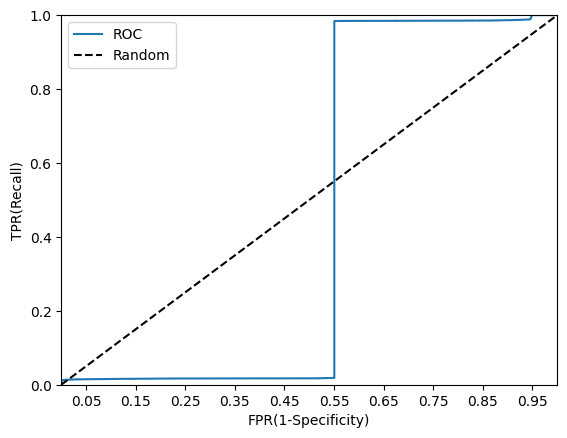

In [11]:
pred_proba = Ir_clf.predict_proba(X_test)
def roc_curve_plot(y_test, pred_proba_c1):
    #임곗값에 따른 FPR, TPR값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    #ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    #FPR X축의 Scale을 0.1 단위로 변경, X,Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

In [13]:
Ir_clf = DecisionTreeClassifier()

Ir_clf.fit(X_train,y_train)
pred = Ir_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차 행렬
[[1679933     352]
 [    375   26194]]
정확도:0.9996, 정밀도:0.9867, 재현율:0.9859,F1:0.9863


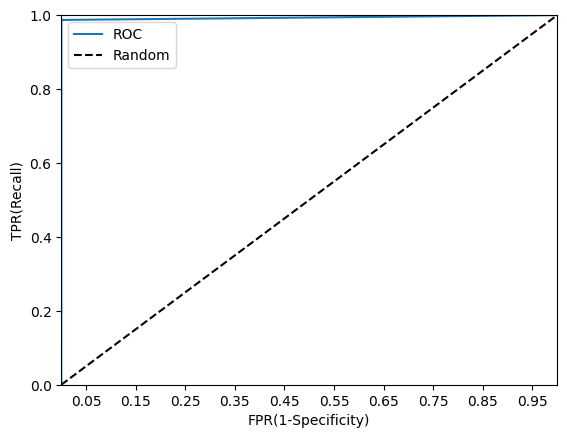

In [14]:
pred_proba = Ir_clf.predict_proba(X_test)
def roc_curve_plot(y_test, pred_proba_c1):
    #임곗값에 따른 FPR, TPR값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    #ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    #FPR X축의 Scale을 0.1 단위로 변경, X,Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

In [ ]:
Ir_clf = RandomForestClassifier()
Ir_clf.fit(X_train,y_train)
pred = Ir_clf.predict(X_test)
get_clf_eval(y_test,pred)

In [ ]:
pred_proba = Ir_clf.predict_proba(X_test)
def roc_curve_plot(y_test, pred_proba_c1):
    #임곗값에 따른 FPR, TPR값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    #ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    #FPR X축의 Scale을 0.1 단위로 변경, X,Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

In [ ]:
Ir_clf = KNeighborsClassifier()
Ir_clf.fit(X_train,y_train)
pred = Ir_clf.predict(X_test)
get_clf_eval(y_test,pred)

In [ ]:
pred_proba = Ir_clf.predict_proba(X_test)
def roc_curve_plot(y_test, pred_proba_c1):
    #임곗값에 따른 FPR, TPR값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    #ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    #FPR X축의 Scale을 0.1 단위로 변경, X,Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])